In [1]:
def do_science(x):
    """
    COMPUTE BOUND
    preprocess brains
    motion capture
    evaluating a population of individual in a genetic algorithm
    different trials of a GA "multistart"
    different parameters for a simulation
    
    IO BOUND
    crawl the internet
    querying a database
    """
    y = x ** 2
    return y

results = []
input_data = range(10)
for x in input_data:
    r = do_science(x)
    results.append(r)
results

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [2]:
results = [do_science(x) for x in input_data]
results

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [5]:
results = map(do_science, input_data)
results = list(results)
results

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

# Parallel threads (e.g, IO bound problems)

In [7]:
%%time
import time

def query_database(x):
    time.sleep(0.1 * x)
    y = x ** 2
    return y

input_data = range(10)
results = list(map(query_database, input_data))
results

CPU times: user 727 µs, sys: 4.17 ms, total: 4.89 ms
Wall time: 4.51 s


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [11]:
%%time
from multiprocessing.pool import ThreadPool

# pool = ThreadPool(processes=2)
# results = pool.map(query_database, input_data)
# pool.close()

with ThreadPool() as pool:
    results = pool.map(query_database, input_data)
results

CPU times: user 8.82 ms, sys: 4.8 ms, total: 13.6 ms
Wall time: 1.01 s


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [10]:
import multiprocessing
multiprocessing.cpu_count()

8

In [12]:
%%time
def preprocess_brains(x):
    n = x * 1e7
    while n > 0:
        n -= 1
    y = x ** 2
    return y

input_data = [1., 3.2, 1.4, 5]
with ThreadPool() as pool:
    results = pool.map(preprocess_brains, input_data)
results

CPU times: user 6.11 s, sys: 3.01 ms, total: 6.11 s
Wall time: 6.08 s


[1.0, 10.240000000000002, 1.9599999999999997, 25]

In [19]:
%%time
input_data = [2.0] * 10
results = list(map(preprocess_brains, input_data))
results

CPU times: user 4.33 s, sys: 0 ns, total: 4.33 s
Wall time: 4.32 s


[4.0, 4.0, 4.0, 4.0]

In [23]:
%%time
from multiprocessing.pool import Pool as ProcessPool

input_data = [2.0] * 10
with ProcessPool(processes=1) as pool:
    results = pool.map(preprocess_brains, input_data)
results

CPU times: user 16.3 ms, sys: 12.3 ms, total: 28.5 ms
Wall time: 10.8 s


[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]

In [27]:
import time
from multiprocessing.pool import Pool as ProcessPool
import multiprocessing
import numpy as np


def preprocess_brains(x):
    n = x * 1e2
    while n > 0:
        n -= 1
    y = x ** 2
    return y


input_data = [2] * 16  # some dummy simulations of equal duration
times = []
n_processes = np.arange(1, multiprocessing.cpu_count() + 4)
for n in n_processes:
    t0 = time.time()
    with ProcessPool(processes=n) as pool:
        result = pool.map(preprocess_brains, input_data)
    times.append(time.time() - t0)

times

[0.016046762466430664,
 0.0173184871673584,
 0.022770166397094727,
 0.025600194931030273,
 0.030436038970947266,
 0.035277605056762695,
 0.04087376594543457,
 0.04527020454406738,
 0.058035850524902344,
 0.060163021087646484,
 0.06758904457092285]

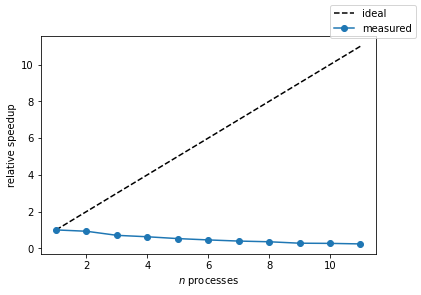

In [28]:
import matplotlib.pyplot as plt
import numpy as np

times = np.array(times)
fig, axes = plt.subplots()
axes.plot(n_processes, 1.0 * n_processes, color='k', linestyle='--', label='ideal')
axes.plot(n_processes, times[0] / times, marker='o', label='measured')
axes.set_xlabel(r'$n$ processes')
axes.set_ylabel('relative speedup')
fig.legend()